  #              HABERMAN CANCER_SURVIVAL DATASET
                                                                                                         

### Objective : 

To predict Whether a patient will survive 5 years or more after the operation based on age , year of operation and the number of positive axillary nodes.

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [198]:
import warnings
warnings.filterwarnings("ignore")

In [201]:
df=pd.read_csv("haberman.csv")
df.head()
df=df.rename(columns={'age':'Age','year':'Operation_Year','nodes':'No_Of_Lymph_Nodes','status':'Survival_Status_After_5_years'})
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


,Age,Operation_Year,No_Of_Lymph_Nodes,Survival_Status_After_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [202]:
df.describe(include="all")

,Age,Operation_Year,No_Of_Lymph_Nodes,Survival_Status_After_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## CONCLUSIONS DRAWN:
  <kbd> <i>AFTER DATA ANALYSIS</i> </kbd>
<p align=center>Person who survived after undergoing surgery for breast cancer<br>status 1 :Died within 5 Years Of Operation<br>status 2:Survived more than 5 Years<br>Conducted between 1958 and 1970<br></p>
* Features: age	year	nodes	
* <i>TARGET: status</i>
* 306 Rows
* No Missing Values
- Lesser the No Of Nodes More Survival chance.
- Lesser the Age More Survival chance.


In [203]:
df.Survival_Status_After_5_years.value_counts()
81/306

1    225
2     81
Name: Survival_Status_After_5_years, dtype: int64

0.2647058823529412

In [204]:
df.head()

,Age,Operation_Year,No_Of_Lymph_Nodes,Survival_Status_After_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [205]:
df.shape

(306, 4)

In [206]:
p=df['Survival_Status_After_5_years']
df.Survival_Status_After_5_years=df.Survival_Status_After_5_years.map({1:"Yes",2:"No"})
df.head()
p.head()

,Age,Operation_Year,No_Of_Lymph_Nodes,Survival_Status_After_5_years
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


0    1
1    1
2    1
3    1
4    1
Name: Survival_Status_After_5_years, dtype: int64

## Univariate Analysis




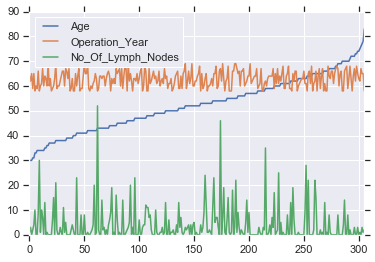

In [137]:
df.plot()
plt.show()

In [138]:
Lst=list(df.columns[:-1:])
Lst

['Age', 'Operation_Year', 'No_Of_Lymph_Nodes']

# BOX PLOT

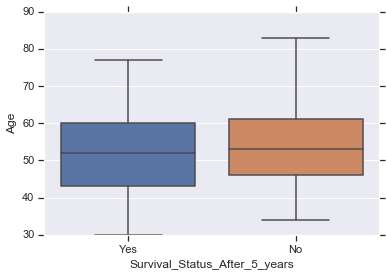

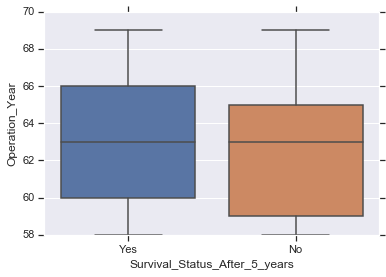

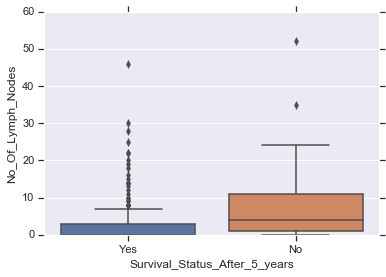

In [139]:
haber=df
for feature in Lst:
    sns.boxplot(x='Survival_Status_After_5_years',y=feature,data=haber)
    plt.show()

### Violin Plot

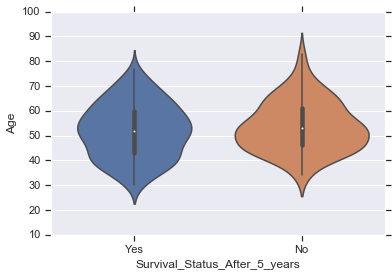

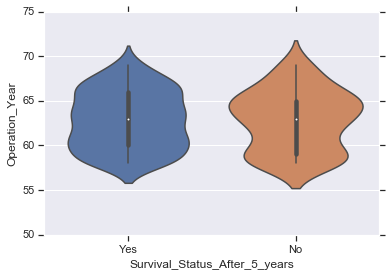

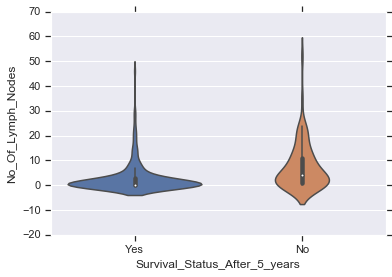

In [140]:
 for feature in Lst:
        sns.violinplot(x='Survival_Status_After_5_years',y=feature,data=haber)
        plt.show()

### Histogram

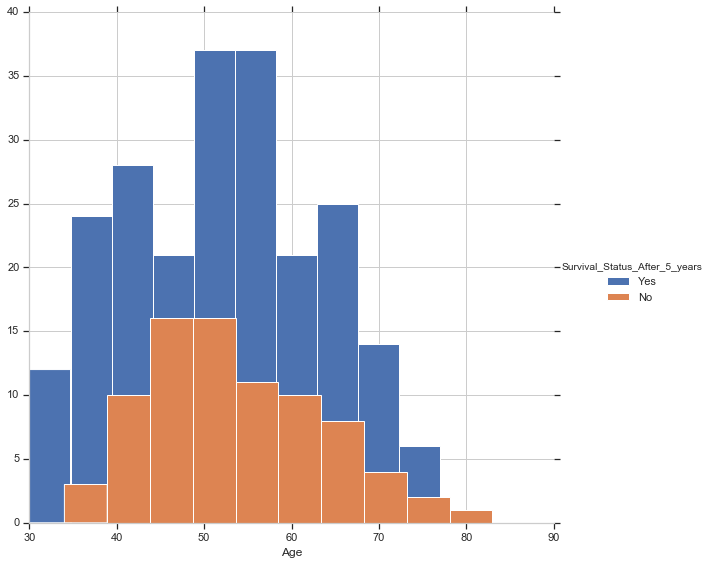

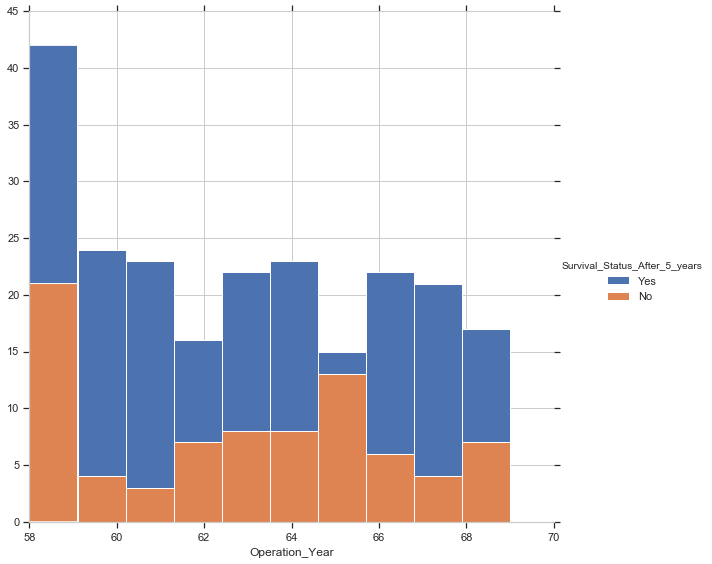

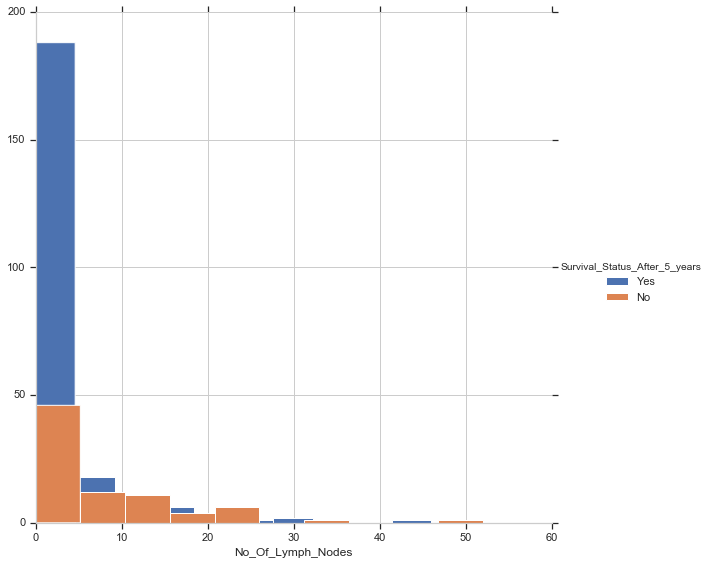

In [71]:
for feature in Lst:
    _,bisn=np.histogram(haber[feature])
    sns.FacetGrid(haber,hue='Survival_Status_After_5_years',height =8)\
    .map(plt.hist,feature).add_legend()
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F5FA80160>,
      dtype=object)

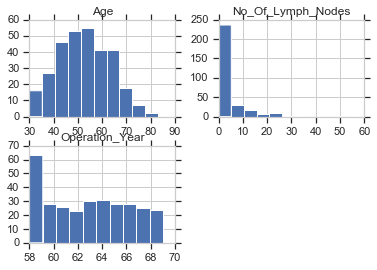

In [72]:
haber.hist()
plt.show()    

### PDF

In [73]:
sns.set(style="ticks", color_codes=True)
haberm=pd.read_csv('haberman.csv')

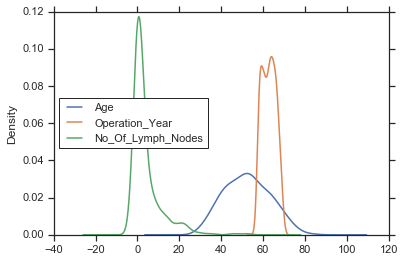

In [74]:
df.plot(kind='density',sharex=False)
plt.show()

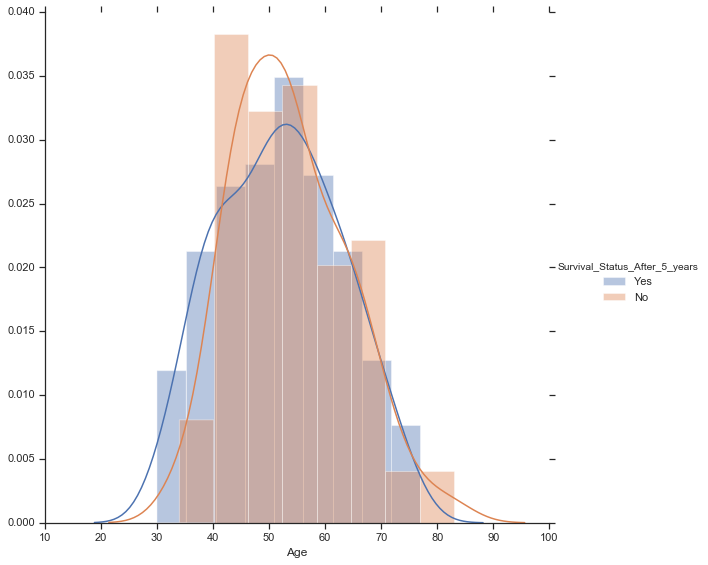

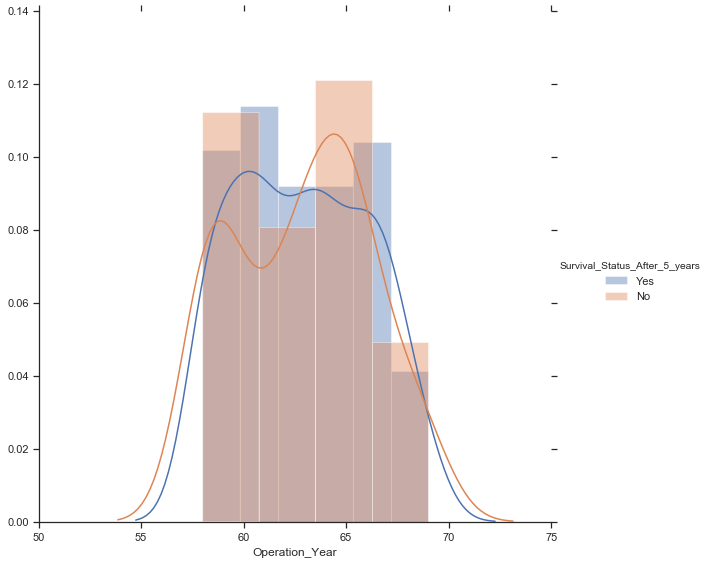

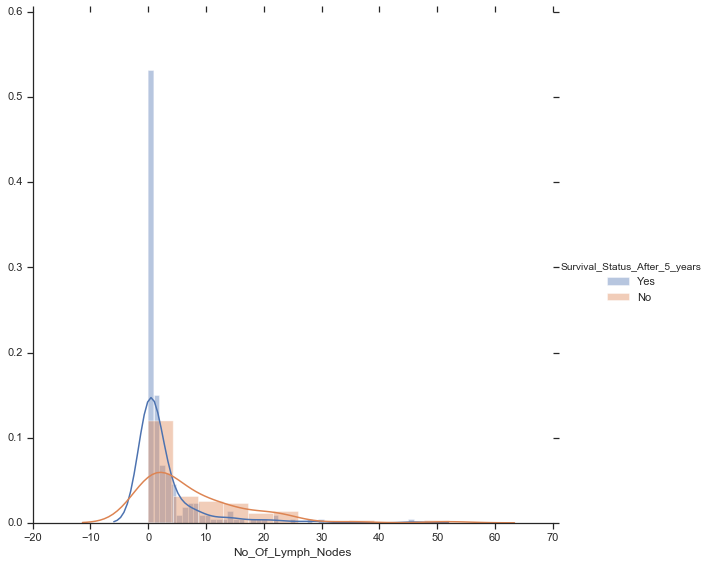

In [75]:
for feature in Lst:
    sns.FacetGrid(haber, hue="Survival_Status_After_5_years", height=8).map(sns.distplot,feature).add_legend();
plt.show();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F6259C710>,
      dtype=object)

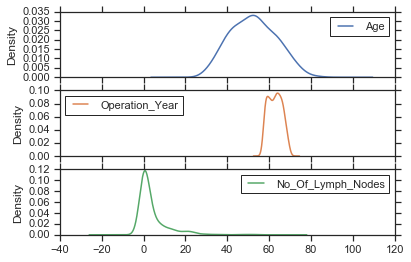

In [76]:
df.plot(kind='density',subplots=True)
plt.show()

## BIVARIATE ANALYSIS

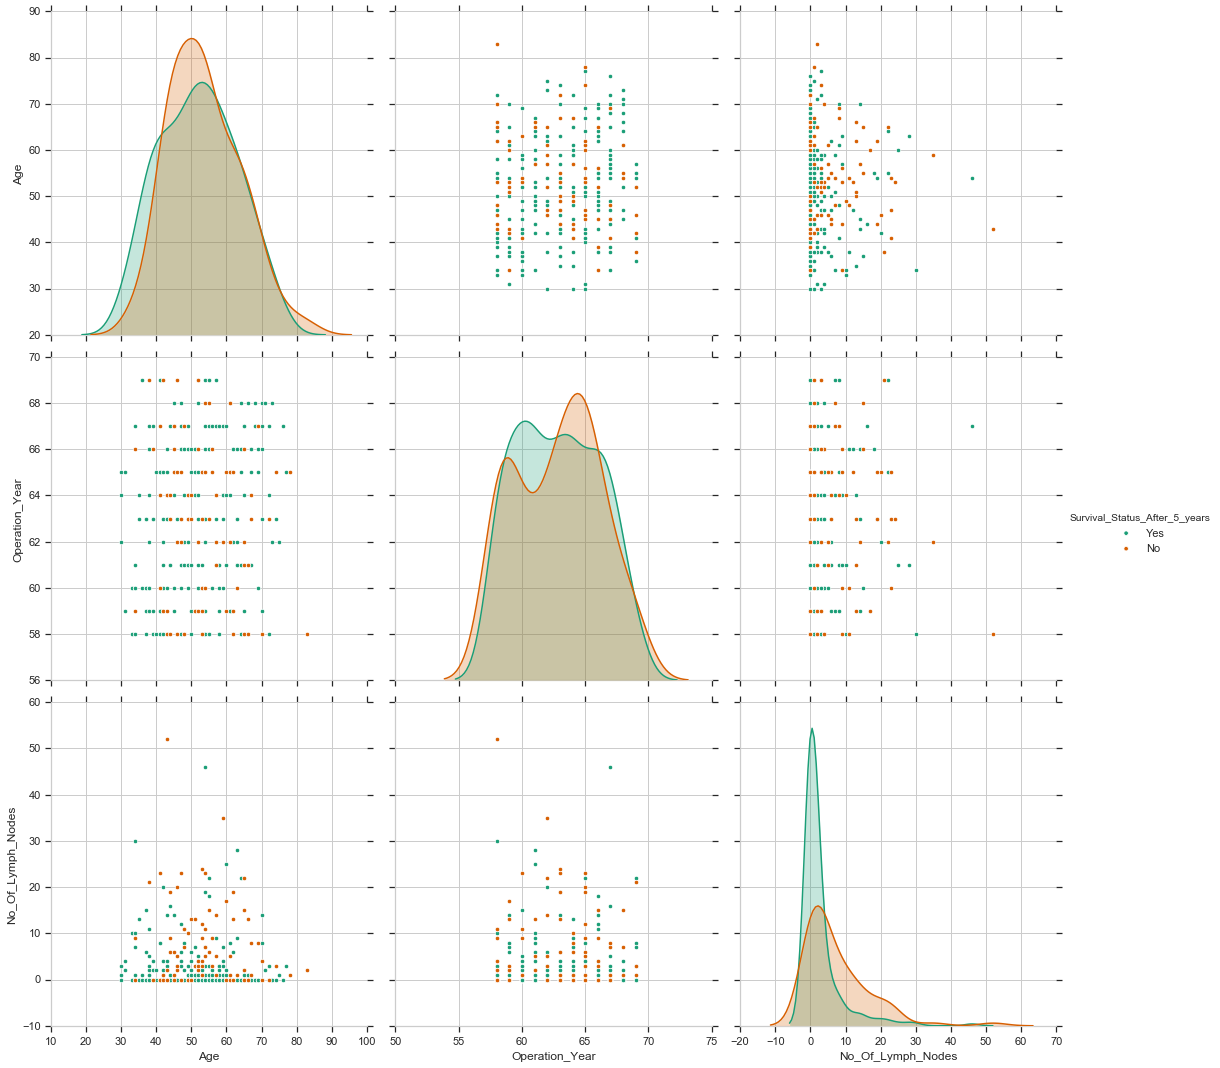

In [77]:
sns.set_style("whitegrid");
sns.pairplot(haber, hue="Survival_Status_After_5_years", height=5,palette='Dark2')

## MODELING

In [207]:
import sklearn

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [234]:
from sklearn.preprocessing import StandardScaler as StndSclr

In [235]:
y=df['Survival_Status_After_5_years']
p.head(2)


0    1
1    1
Name: Survival_Status_After_5_years, dtype: int64

In [236]:
m=df.drop('Survival_Status_After_5_years',axis=1)
x=m.copy()
x=(StndSclr().fit(x)).transform(x)


In [295]:
X_train, X_test, y_train, y_test = train_test_split(x, p, test_size=0.30, random_state=100)
model=MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2),max_iter=500,random_state=1,activation='identity')
model.fit(X_train,y_train)

MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [292]:
models=[]
models.append((SVC(),'SUPPORT_VECTOR_MACHINES'))
models.append((LogisticRegression(solver='liblinear'),'LogReg'))
models.append((LinearDiscriminantAnalysis(),'LinearDiscriminantAnalysis'))
models.append((RandomForestClassifier(n_estimators=75, max_features=2),'RandomForests'))
models.append((MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2),max_iter=500,random_state=1,activation='identity'),'MLP'))
results=[]
names=[]
#model=SVC().fit(X_train,y_train)
              
for model,name in models:
    kfold = KFold(n_splits=5, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SUPPORT_VECTOR_MACHINES: 0.724031 (0.083433)
LogReg: 0.738317 (0.082386)
LinearDiscriminantAnalysis: 0.738317 (0.082386)
RandomForests: 0.662901 (0.118907)
MLP: 0.743079 (0.082922)


In [299]:
modelOutput=model.predict(X_test)
d=confusion_matrix(y_test,modelOutput)
d

array([[64,  5],
       [17,  6]], dtype=int64)

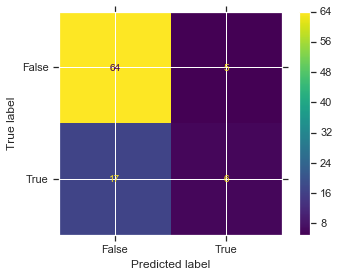

In [300]:
p=ConfusionMatrixDisplay(d,['False','True'])
print(p.plot())

In [301]:
print(classification_report(modelOutput,y_test))

              precision    recall  f1-score   support

           1       0.93      0.79      0.85        81
           2       0.26      0.55      0.35        11

    accuracy                           0.76        92
   macro avg       0.59      0.67      0.60        92
weighted avg       0.85      0.76      0.79        92



In [117]:
grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

from sklearn.model_selection import GridSearchCV

updatedModel=GridSearchCV(SVC(),grid,refit=True,cv=6,verbose=2)

In [118]:
updatedModel=updatedModel.fit(X_train,y_train)

Fitting 6 folds for each of 25 candidates, totalling 150 fits
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] ....................... gamma=1, kernel=rbf, C=0.1, total=   0.0s
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] ....................... gamma=1, kernel=rbf, C=0.1, total=   0.0s
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] ....................... gamma=1, kernel=rbf, C=0.1, total=   0.0s
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] ....................... gamma=1, kernel=rbf, C=0.1, total=   0.0s
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] ....................... gamma=1, kernel=rbf, C=0.1, total=   0.0s
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] ....................... gamma=1, kernel=rbf, C=0.1, total=   0.0s
[CV] gamma=0.1, kernel=rbf, C=0.1 ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... gamma=0.1, kernel=rbf, C=1, total=   0.0s
[CV] gamma=0.1, kernel=rbf, C=1 ......................................
[CV] ....................... gamma=0.1, kernel=rbf, C=1, total=   0.0s
[CV] gamma=0.1, kernel=rbf, C=1 ......................................
[CV] ....................... gamma=0.1, kernel=rbf, C=1, total=   0.0s
[CV] gamma=0.1, kernel=rbf, C=1 ......................................
[CV] ....................... gamma=0.1, kernel=rbf, C=1, total=   0.0s
[CV] gamma=0.1, kernel=rbf, C=1 ......................................
[CV] ....................... gamma=0.1, kernel=rbf, C=1, total=   0.0s
[CV] gamma=0.01, kernel=rbf, C=1 .....................................
[CV] ...................... gamma=0.01, kernel=rbf, C=1, total=   0.0s
[CV] gamma=0.01, kernel=rbf, C=1 .....................................
[CV] ...................... gamma=0.01, kernel=rbf, C=1, total=   0.0s
[CV] gamma=0.01, kernel=rbf, C=1 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


In [119]:
predictions=updatedModel.predict(X_test)
updatedModel.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [120]:
confusion_matrix(y_test,predictions)

array([[62,  7],
       [14,  9]], dtype=int64)

In [121]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        69
           2       0.56      0.39      0.46        23

    accuracy                           0.77        92
   macro avg       0.69      0.64      0.66        92
weighted avg       0.75      0.77      0.76        92



# Model Saving

In [122]:
import pickle

In [123]:
filename = 'finalized_Haberman_model.sav'
pickle.dump(updatedModel, open(filename, 'wb'))

In [124]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7717391304347826


In [125]:

result = updatedModel.score(X_test, y_test)
print(result)
result = model.score(X_test, y_test)
print(result)


0.7717391304347826
0.7608695652173914
